# Exploratory Data Analysis -Global Terrorism

By- Deepanshu Rai 

### As a security Defence/Analyst lets try to find the hot zone of terrorism.

In [78]:
#importing the required python librares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [73]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

D:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.isnull().sum()  #displaying the null values in each column

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

Lets make a Copy of our dataset for further analysis.

In [6]:
df2 = df.copy()

In [7]:
df2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


As we see many columns with null values throughout the Rows it will be better to delete these Columns.

In [8]:
df2.dropna(axis=1,how='all') #dropping the columns

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


Renaming the columns so that the columns names will be easy to understand for future reference. 

In [9]:
#df2.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','region_txt':'Region','country':'Country_no.',
#                   'country_txt':'Country','region':'Region_No.','region_txt':'Region','provstate':'State','city':'City',
#                  'attacktype1_txt':'AttackType','targtype1_txt':'Target_type','gname':'Gname' },inplace=True)

In [11]:
#Rename columns in order to get better format
df2.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

In [19]:
#Keep 22 columns
data = df2[['Eventid', 'Year','Month','Day','Country', 'Region', 'Provstate', 'City',  
                  'Success', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound','Crit1', 'Crit2', 'Crit3','Suicide' ]]

In [20]:
data.head()

,Eventid,Year,Month,Day,Country,Region,Provstate,City,Success,Attacktype,...,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound,Crit1,Crit2,Crit3,Suicide
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,Assassination,...,MANO-D,0.0,NaN,Unknown,1.0,0.0,1,1,1,0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,1,Hostage Taking (Kidnapping),...,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0,1,1,1,0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,Assassination,...,Unknown,0.0,NaN,Unknown,1.0,0.0,1,1,1,0
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,1,Bombing/Explosion,...,Unknown,0.0,NaN,Explosives,NaN,NaN,1,1,1,0
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,Facility/Infrastructure Attack,...,Unknown,0.0,NaN,Incendiary,NaN,NaN,1,1,1,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   Provstate    181270 non-null  object 
 7   City         181257 non-null  object 
 8   Success      181691 non-null  int64  
 9   Attacktype   181691 non-null  object 
 10  Targtype     181691 non-null  object 
 11  Natlty1      180132 non-null  object 
 12  Gname        181691 non-null  object 
 13  Guncertain1  181311 non-null  float64
 14  Claimed      115571 non-null  float64
 15  Weaptype     181691 non-null  object 
 16  Nkill        171378 non-null  float64
 17  Nwound       165380 non-null  float64
 18  Crit1        181691 non-

In [39]:
#SOME INFO FIRST
print('Country with the highest number of Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with the highest number of  Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum number of people were killed by a single terrorist attack are',data['Nkill'].max(),'people that took place in',data.loc[data['Nkill'].idxmax()].Country)
print('Maximum attacks took place in',data['Year'].value_counts().index[0])
print('The Maximum Attacks are initiated by',data['Gname'].value_counts().index[1])

Country with the highest number of Terrorist Attacks: Iraq
Regions with the highest number of  Terrorist Attacks: Middle East & North Africa
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq
Maximum attacks took place in 2014
The Maximum Attacks are initiated by Taliban


In [23]:
#Add column Damage (Number of Dead/Injured people) by adding Nkill and Nwound
data['Damage']=data['Nkill']+data['Nwound']

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now we can perform some insightful analysis on the data.

## Analysis of Global Terrorism from 1970 to 2017

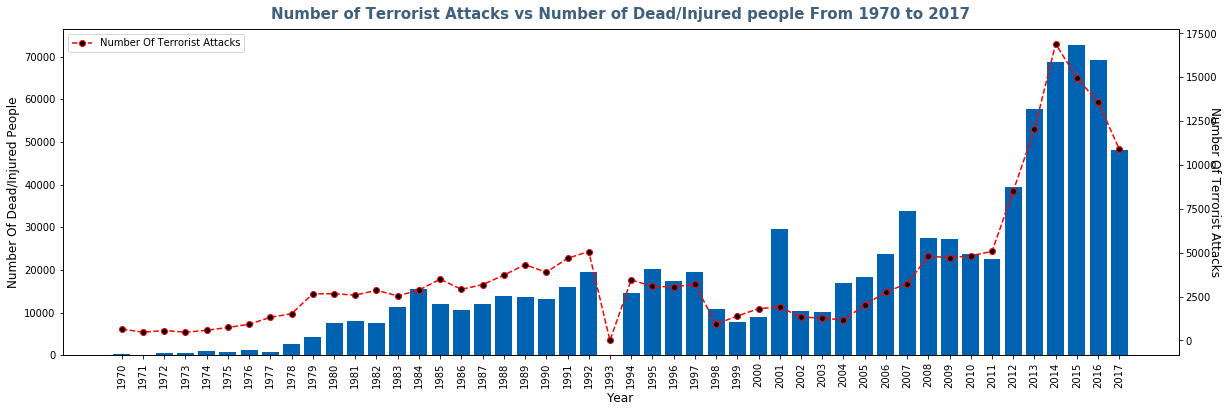

In [29]:
#Filter Data to choose Number Of Dead/Injured People In Terrorist Attacks From 1970 to 2017
people_damage = data[["Year","Damage"]].groupby('Year').sum()
list_year =  data["Year"].unique().tolist()

#draw bar chart
fig, ax1 = plt.subplots(figsize = (20,6))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values], color= '#0063B1' )

ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', size = 12)
ax1.set_xlabel('Year', size = 12)
ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 15, pad= 10, weight ='bold', 
                    color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
ax2 = ax1.twinx()

#Filter & get a number of attacked in the world from 1970 to 2017 
number_attack = []
for year in list_year:
    number_attack.append(len(data[data['Year'] == year][["Year"]]))
number_attack.insert(23, 0)

#draw plot chart
ax2.set_ylabel('Number Of Terrorist Attacks', size = 12,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', mfc='k', label='Number Of Terrorist Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

This graph show the number of global terrorist attacks and number of dead/injured people by year from 1970 to 2017. Overall, the number of attacks is increasing. The number of dead/injured people also increases respectively. The number of attack increased significantly from 2012 to 2015. The year 2015 is unlucky year with nearly 17000 reported terrorist attacks.


## Analyse the Terrorist attack types and Damage

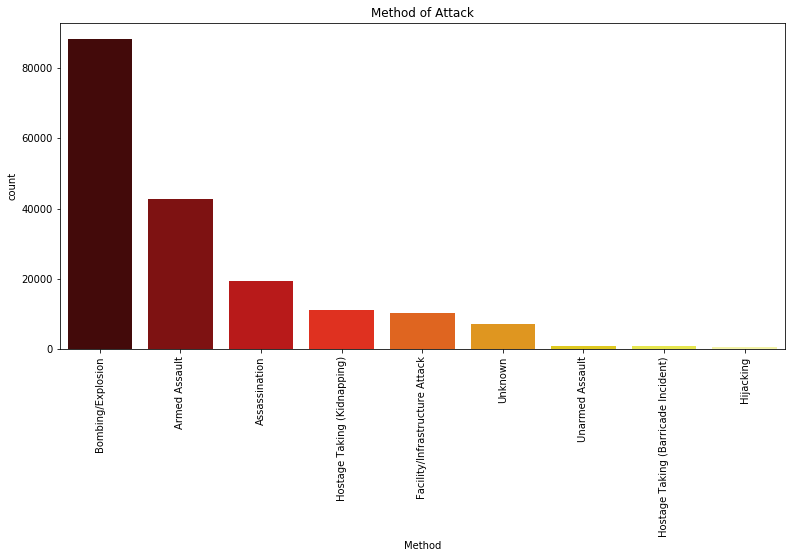

In [40]:
plt.figure(figsize=(13,6))
sns.countplot(df['attacktype1_txt'],data=df,order=df['attacktype1_txt'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

## Country And Region

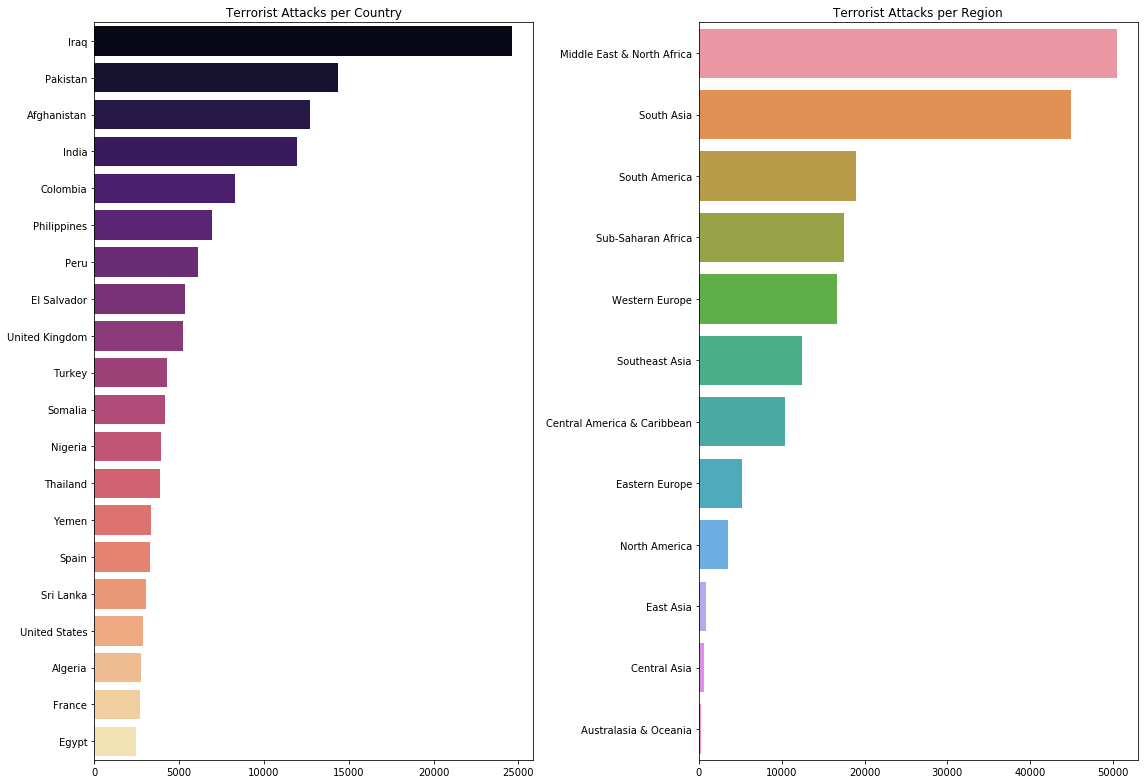

In [43]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df['country_txt'].value_counts()[:20].values, y = df['country_txt'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=df['region_txt'].value_counts().values,y=df['region_txt'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()


## Active Organizations

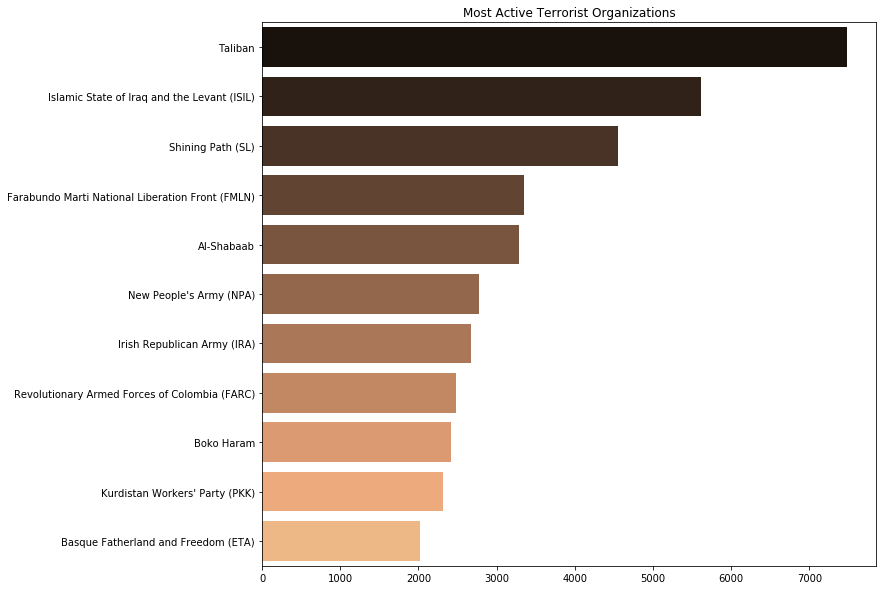

In [46]:
plt.subplots(figsize=(11,10))
sns.barplot(y=df['gname'].value_counts()[1:12].index,x=df['gname'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

### Draw chart of Top 10 Attacked Countries and Top 10 Targeted Nationalities with the specific year input

Input the Year you want to see chart! (1970 -2017): 2000


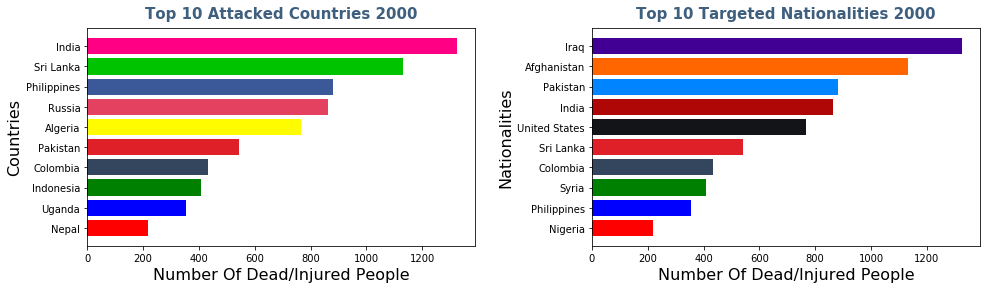

In [48]:
def country_nationality(n):
  
    """
    Function to draw the bar charts 
    of Top 10 Attacked Countries and Top 10 Targeted Nationalities 
    """

    #Filter data and choose Top 10 Attacked Countries
    top10_bad = data[data['Year'] == n][["Country", "Damage"]].groupby('Country',as_index=False).sum()
    data_paint = top10_bad.sort_values(by='Damage', ascending = False).head(10)

    #Paint bar chart
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    ax[0].barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = ['red', 'blue', 'green', '#34465D', '#df2029', '#FFFC00', '#E4405F', '#3B5999', '#00c300', '#ff0084'])
    ax[0].set_ylabel('Countries', size=16)
    ax[0].set_xlabel('Number Of Dead/Injured People', size=16)
    ax[0].set_title("Top 10 Attacked Countries %d" % n, fontsize= 15, pad= 10, weight ='bold', 
                  color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
    plt.subplots_adjust(wspace=0.3)
    #Filter data and choose Top 10 Targeted Nationalities    
    nalty_damage = data[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
    data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)

    #Paint bar chart
    ax[1].barh(data_paint_natlty["Natlty1"][::-1], data_paint["Damage"][::-1], color = ['red', 'blue', 'green', '#34465D', '#df2029', '#131418', '#AF0606', '#0084ff', '#ff6600', '#410093'])
    ax[1].set_xlabel('Number Of Dead/Injured People',size=16)
    ax[1].set_ylabel('Nationalities', size=16)
    ax[1].set_title("Top 10 Targeted Nationalities %d" % n, fontsize= 15, pad= 10, weight ='bold', 
                  color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
    for ax in fig.axes:
        plt.sca(ax)
    plt.show()
def country_nationality_year():
    """
    Function to paint chart with specific input year
    """

  # Input year. Try if it in list_year
    try:
        year = int(input ('Input the Year you want to see chart! (1970 -2017): '))
        if year == 1993:
            print('Sorry, No Terrorism Data in 1993')
            year = int(input ('Input the Year you want to see chart! (1970 -2017): '))
        while year not in list_year:
            print("Please Input the year from 1970 to 2017")
            year = int(input('Input the Year you want to see chart! (1970 -2017): '))

  #When have error, print error and call function timseri_year
    except (ValueError, ZeroDivisionError) as ex:  # Called when have error typing
        print("Wrong type, input again: ")
        country_nationality_year()

  #when don't have error: 
    else:
       #print chart with function timeseri(year)
        country_nationality(year)
country_nationality_year()

In [49]:
country_damage = data[data['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()

## Safest Countiries in Term Of Terrorism

In [50]:
#Filter from dataframe country_damage
country_damage[country_damage["Damage"]==0]

,Country,Damage
9,Bahamas,0.0
14,Belize,0.0
34,Cyprus,0.0
64,Iceland,0.0
105,New Zealand,0.0
117,Portugal,0.0
129,Slovenia,0.0
139,Swaziland,0.0
147,Togo,0.0
160,Vietnam,0.0


Bahamas seems to be the most safe country in respect to no. of damage caused due to terrorism . This is followed by Belize and Cyprus . 

## Weapon Types And Damage

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


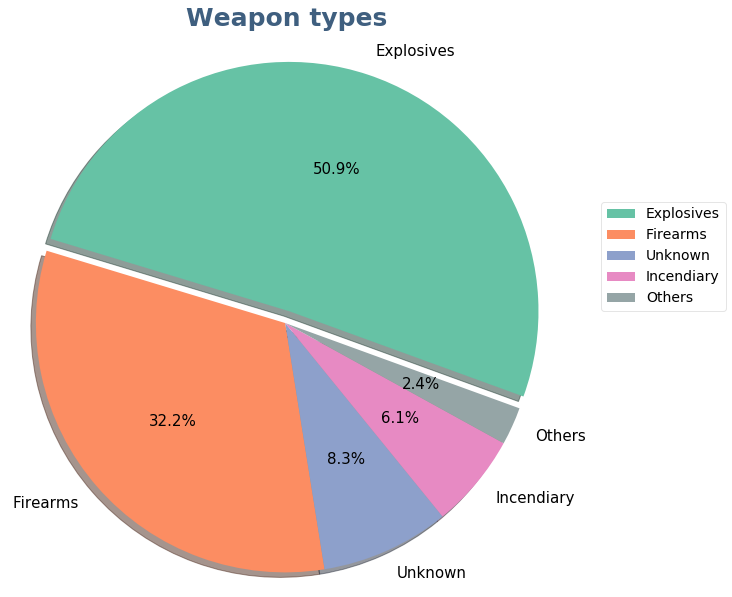

In [51]:
weaptype_filtered =data['Weaptype'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown',
                                                               'Incendiary'] else 'Others')
weaptype = weaptype_filtered.value_counts().tolist()

# Pie chart of weapons types
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']

weap_sizes = []

for j in weaptype:
    percent = j*100/len(data['Weaptype'])
    weap_sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(weap_sizes, labels=weap_labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:4:1]+
                                   [(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Weapon types', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph

ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.2,0.5,0.1,1), prop={'size': 14})
fig.show()

In [52]:
# Create table_2 about Weapon types and number of Dead/Injured People
table_2 = data[['Weaptype','Damage']].groupby('Weaptype',as_index = False).sum().sort_values(by='Damage', 
                                                                                             ascending=False)
df_count = data['Weaptype'].value_counts()
df_count = df_count.reindex(table_2['Weaptype'].values)
table_2['WeapCount'] = df_count.values
table_2["Weap_damage_rate"] = table_2["Damage"]/table_2["WeapCount"]
table_2


,Weaptype,Damage,WeapCount,Weap_damage_rate
2,Explosives,537788.0,92426,5.818579
4,Firearms,225473.0,58524,3.852659
10,Unknown,50167.0,15157,3.309824
11,Vehicle (not to include vehicle-borne explosiv...,20297.0,136,149.242647
6,Melee,14489.0,3655,3.964159
1,Chemical,14377.0,321,44.788162
5,Incendiary,8898.0,11135,0.799102
0,Biological,814.0,35,23.257143
9,Sabotage Equipment,357.0,141,2.531915
7,Other,225.0,114,1.973684


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


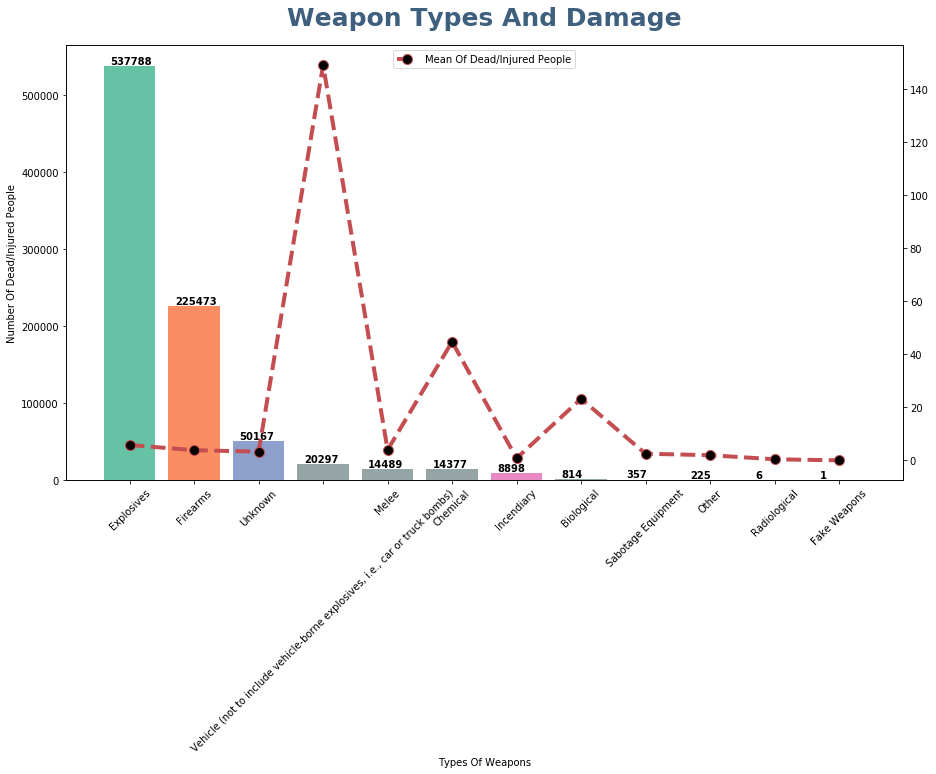

In [54]:
# Set same color with previous pie chart
weap_labels = table_2['Weaptype'].tolist()
y = np.arange(len(weap_labels)) 
weap_dmg = table_2['Damage'].tolist()

w_cat = ['Explosives','Firearms','Unknown','Incendiary']
w_color_cat = sns.color_palette("Set2", 8)[:4:1]
w_color_cat_dict = dict(zip(w_cat, w_color_cat))

w_gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
w_color_list = [w_color_cat_dict[ter_type] if ter_type in w_color_cat_dict.keys() 
                else w_gray for ter_type in weap_labels]

w_rate = table_2["Weap_damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(weap_labels, weap_dmg,
       color = w_color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(weap_dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')


# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(weap_labels, w_rate, linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People',
        color = '#C44D51')

plt.title('Weapon Types And Damage', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax1.set(xlabel='Types Of Weapons', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(weap_labels, rotation=45)

plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()

## Most Affected Targets 

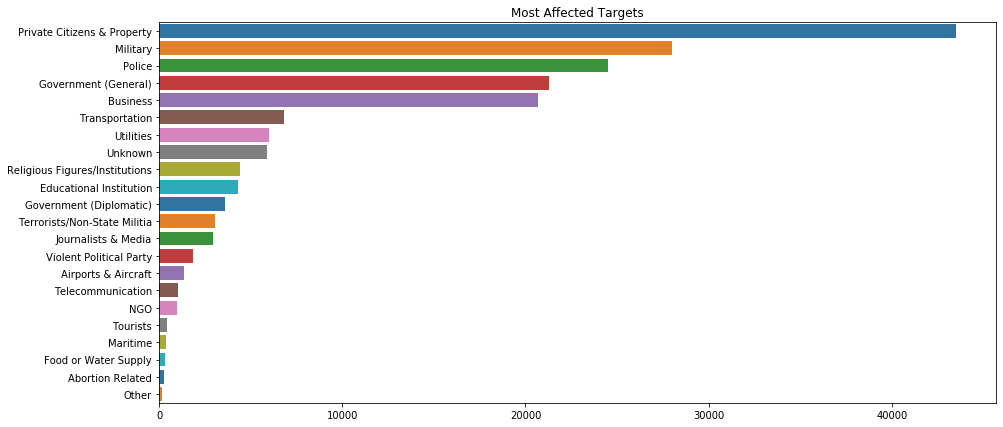

In [55]:
plt.subplots(figsize=(15,7))
sns.barplot(y=df['targtype1_txt'].value_counts().index,x=df['targtype1_txt'].value_counts().values,
           palette='tab10')
plt.title('Most Affected Targets')
plt.show()

# A Closer Look At Trends

## i. Large spikes in the average number of casualties per year are associated with landmark terrorist events

In [ ]:
# df = df[['iyear','imonth','iday','extended','country_txt','region_txt','attacktype1_txt','city','targtype1_txt','nkill','nwound','gname']]
df['casualties'] = df['nkill'] + df['nwound']
df.head()

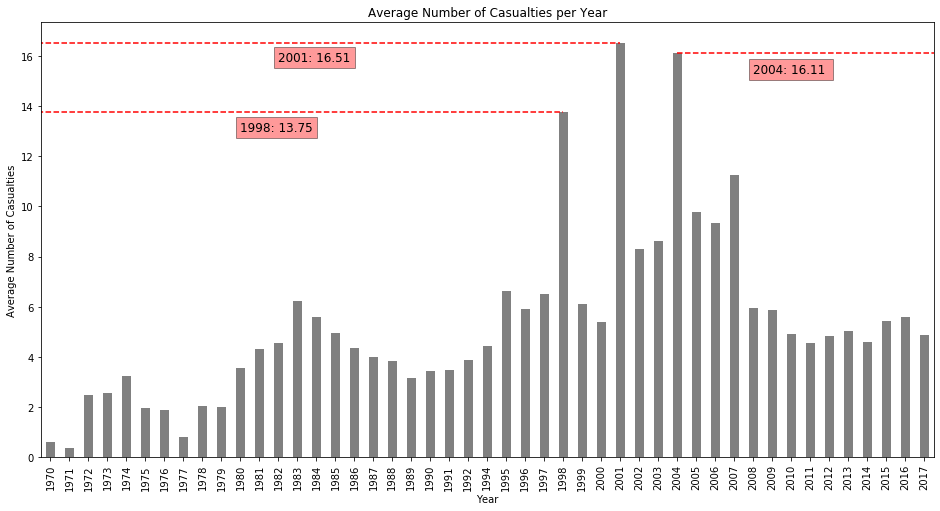

In [58]:
fig,axes = plt.subplots(figsize=(16,8))
avg_casualties = df.groupby('iyear').mean()['casualties']
avg_casualties.plot.bar(color='grey')
plt.xlabel('Year')
plt.ylabel('Average Number of Casualties')
plt.title('Average Number of Casualties per Year')
plt.hlines(y=avg_casualties.loc[1998],colors='red',xmin=-4,xmax=27,linestyles='--')
plt.hlines(y=avg_casualties.loc[2001],colors='red',xmin=-4,xmax=30,linestyles='--')
plt.hlines(y=avg_casualties.loc[2004],colors='red',xmin=33,xmax=50,linestyles='--')
plt.text(10, 13, '1998: 13.75',fontsize=12,bbox=dict(facecolor='red', alpha=0.4))
plt.text(12, 15.8, '2001: 16.51',fontsize=12,bbox=dict(facecolor='red', alpha=0.4))
plt.text(37, 15.3, '2004: 16.11 ',fontsize=12,bbox=dict(facecolor='red', alpha=0.4))
plt.show()

1998 - US Embassy bombings in Kenya and Tanzania (4,200+ casualties)
2001 - 9/11 WTC and Pentagon attacks (approx. 10,000 casualties)
2004 - Madrid train bombings (2,000+ casualties)

The ability for these events to draw their respective years' average casualties so high really shows their significance.

## ii. Before and after the War on Terror

After the 9/11 attacks in New York City, the US-led War on Terror was launched with the goal to distinguish terrorism primarily in the Middle East. Here, it is shown as a turning point for activity patterns in each region.

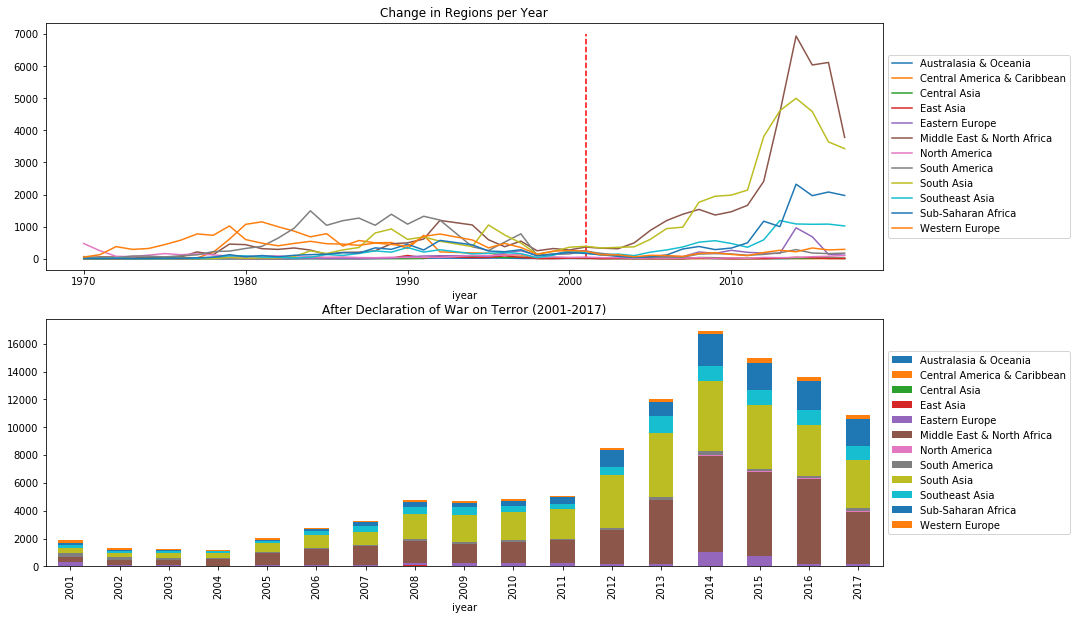

In [59]:
df_after = df[df['iyear']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(df.iyear,df.region_txt).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(df_after.iyear,df_after.region_txt).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

From the first plot, it is very noticeable that the terrorism landscape before and after the War on Terror is vastly different. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.



## iii. The shift from Western Europe to Eastern Europe

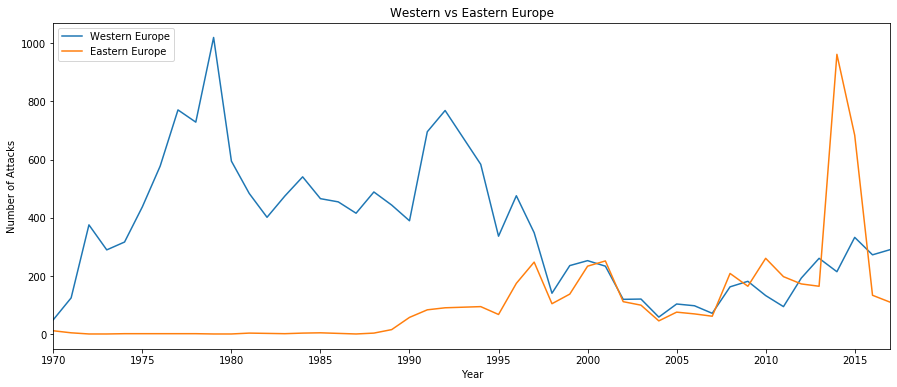

In [60]:
fig,axes = plt.subplots(figsize=(15,6))
sns.lineplot(df[df['region_txt']=='Western Europe']['iyear'].value_counts().index,
             df[df['region_txt']=='Western Europe']['iyear'].value_counts().values)
sns.lineplot(df[df['region_txt']=='Eastern Europe']['iyear'].value_counts().index,
             df[df['region_txt']=='Eastern Europe']['iyear'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,5))
plt.xlim(1970,2017)
plt.ylabel('Number of Attacks')
plt.title('Western vs Eastern Europe')
axes.legend(labels=['Western Europe','Eastern Europe'])
plt.show()

Though Western Europe has seen considerably more terrorism in the past, there is now a shift in activity towards the east. 1991 seems to be a turning point here considering the dissolution of the Soviet Union at the time and the numerous accounts of unrest that followed. The spike at 2014 can be attributed to the recent Ukrainian revolution and related Ukrainian-Russian conflicts such as the war in Donbass. The following plots show the number of Russia and Ukraine's terrorist events compared to the rest of Eastern Europe.

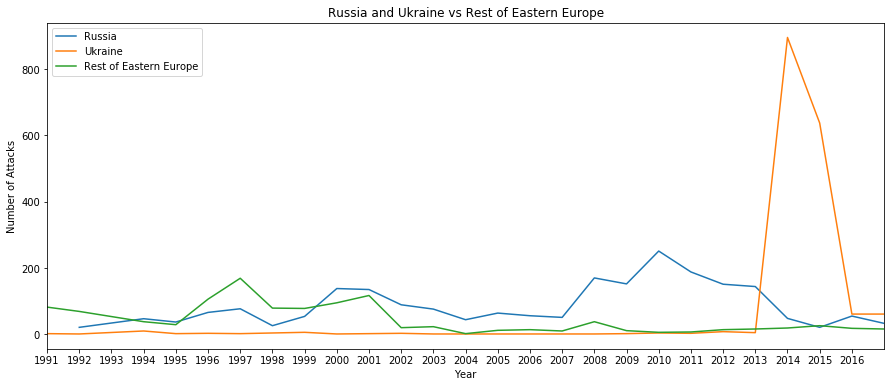

In [61]:
fig,ax = plt.subplots(figsize=(15,6))
russia = df[(df['country_txt']=='Russia') & (df['iyear'].between(1991,2017,inclusive=True))]['iyear'].value_counts()
ukraine = df[(df['country_txt']=='Ukraine') & (df['iyear'].between(1991,2017,inclusive=True))]['iyear'].value_counts()
rest_east = df[(df['country_txt']!='Russia') & (df['country_txt']!='Ukraine')
               & (df['region_txt']=='Eastern Europe')& (df['iyear'].between(1991,2017,inclusive=True))]['iyear'].value_counts()
sns.lineplot(x=russia.index,y=russia.values)
sns.lineplot(x=ukraine.index,y=ukraine.values)
sns.lineplot(x=rest_east.index,y=rest_east.values)
plt.xticks(np.arange(1991,2017,1))
plt.xlim(1991,2017)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Russia and Ukraine vs Rest of Eastern Europe')
ax.legend(labels=['Russia','Ukraine','Rest of Eastern Europe'])
plt.show()

Clearly, Russia and Ukraine are the main contributers to this shift. Ukraine's isolated spike in 2014 shown here is nearly identical to the previous plot. A large majority of Eastern European terrorism in the past couple years has been found in Ukraine.


## iv. Are extended attacks more lethal?

Extended attacks are defined as events that last longer than 24 hours. Does a longer timeframe mean a higher rate of casualties? Lets first look at which methods of attack tend to be extended or unextended.

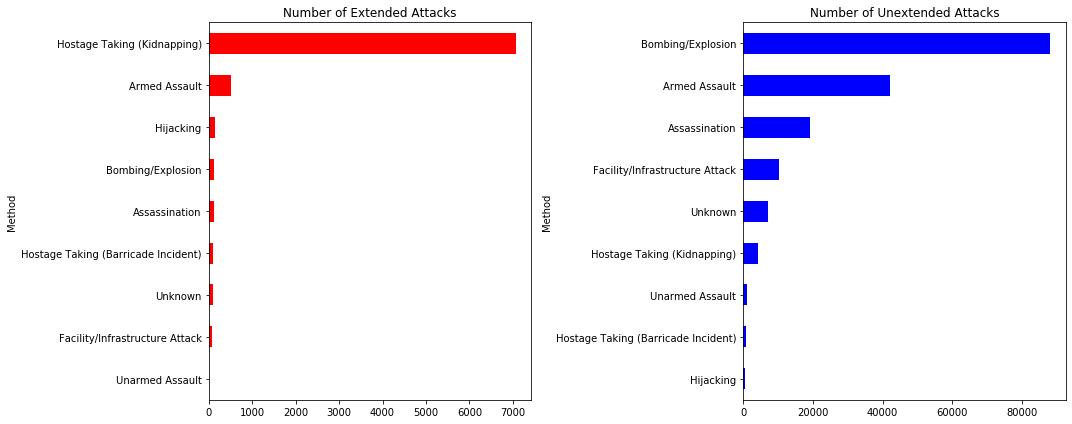

In [62]:

fig,ax = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
ax[0]=df[df['extended']==1].groupby('attacktype1_txt').count()['extended'].sort_values().plot.barh(color='red',ax=ax[0])
ax[1]=df[df['extended']==0].groupby('attacktype1_txt').count()['extended'].sort_values().plot.barh(color='blue',ax=ax[1])
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()


Extended attacks overwhelmingly consist of hostage taking. On the other hand, extended attacks seem to be a bit more spread between bombings/explosions, armed assaults, and assassination

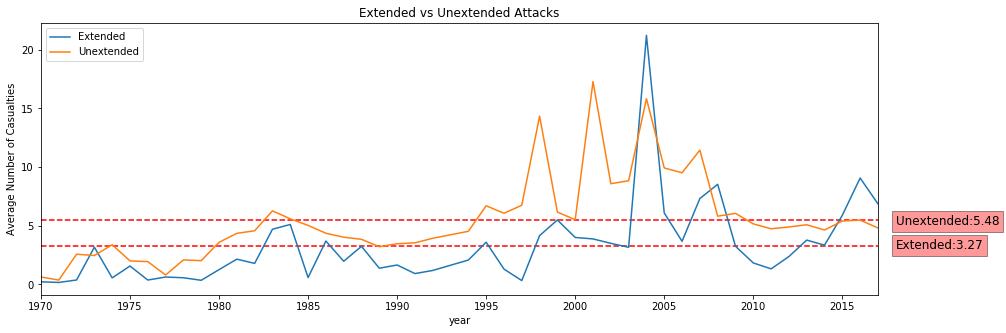

In [63]:
fig,axes = plt.subplots(figsize=(15,5))
ext_casualties = df[df['extended']==1].groupby('iyear').mean()['casualties']
ext_casualties.plot()
unext_casualties = df[df['extended']==0].groupby('iyear').mean()['casualties']
unext_casualties.plot()
plt.title('Extended vs Unextended Attacks')
plt.xlabel('year')
plt.xlim(1970,2017)
plt.xticks(np.arange(1970,2017,5))
plt.ylabel('Average Number of Casualties')
plt.hlines(y=ext_casualties.mean(),colors='red',xmin=1970,xmax=2017,linestyles='--')
plt.hlines(y=unext_casualties.mean(),colors='red',xmin=1970,xmax=2017,linestyles='--')
plt.text(2018, 3, 'Extended:3.27',fontsize=12,bbox=dict(facecolor='red', alpha=0.4))
plt.text(2018, 5.1, 'Unextended:5.48',fontsize=12,bbox=dict(facecolor='red', alpha=0.4))
axes.legend(labels=['Extended','Unextended'],loc='upper left')
plt.show()

Unextended attacks seem to have been historically more lethal, with on average 2.2 more casualties than extended attacks. This is expected given the fact that bombings and explosions are the most used form of terrorism. Generally, these events happen in a shorter timeframe but are outright more destructive than extended attacks such as hostage takings